In [287]:
import pandas as pd
import numpy as np

### Using the final data file (I checked if data is compatible beforehand)

In [288]:
df = pd.read_csv('new_results_survey.csv')

df.drop(columns=df.iloc[:,1:6].columns.tolist(), axis=1, inplace=True)

### Removing unnecessary columns

In [289]:
# checking if all consents were signed
if (df.iloc[:, 1:11] == 'no').any(axis=1).any():
    print("Not all participants signed the consents.")
else:
    print("All participants signed the consents and fulfill all the requirements.")
    
    
df.drop(columns=df.iloc[:,1:11].columns.tolist(), axis=1, inplace=True)
df.drop(columns=df.iloc[:,2:8].columns.tolist(), axis=1, inplace=True)

df.drop(columns=df.columns[-1], inplace=True)

All participants signed the consents and fulfill all the requirements.


### Converting text variables into numerical ones & adjusting the scales (some columns still need to be handled)

In [290]:
df.loc[df.iloc[:, 1] == 'Cognitive Science Bachelor program at the Osnabrück University', df.columns[1]] = int(0) #Bachelor
df.loc[df.iloc[:, 1] == 'Cognitive Science Master program at the Osnabrück University', df.columns[1]] = int(1) #Master

def into_liekert(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (5)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (6)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (7)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = np.nan

    return df

for indices in range(2,6):
    into_liekert(indices)   

def into_liekert_parentheses(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('(1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('(2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('(3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('(4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('(5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('(6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('(7)'):
                df.loc[index, df.columns[col_index]] = 7

    return df

into_liekert_parentheses(6)

def into_liekert_single_parenthesis(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('7)'):
                df.loc[index, df.columns[col_index]] = 7
            elif value.startswith('8)'):
                df.loc[index, df.columns[col_index]] = np.nan

    return df

into_liekert_single_parenthesis(7)

for indices in range(8, 16):
    into_liekert(indices)

def new_liekert_scale(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (8)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (5)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (6)', df.columns[col_index]] = int(7)

    return df


for indices in range(16, 22):
    new_liekert_scale(indices)

for indices in range(22, 30):
    into_liekert_parentheses(indices)


def liekert_reverse(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly Agree (1)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Agree (2)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Somewhat Agree (3)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat Disagree (5)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Disagree (6)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Strongly Disagree (7)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = np.nan

    return df

for indices in range(30, 39):
    liekert_reverse(indices)

into_liekert_parentheses(39)

for indices in range(40, 49):
    liekert_reverse(indices)

into_liekert_parentheses(49)

def yes_vs_no(col_index):
    df.loc[df.iloc[:, col_index] == 'No', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Yes', df.columns[col_index]] = int(1)

    return df

for indices in range(49, 76):
    yes_vs_no(indices)

for indices in range(76, 85):
    yes_vs_no(indices)

def frequency_scale(col_index):
    df.loc[df.iloc[:, col_index] == '(1) Everyday', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == '(2) Most of the days', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == '(3) Half of the days or slightly more', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == '(4) Some of the days', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == '(5) Never', df.columns[col_index]] = int(1)

    return df

for indices in range(86, 97):
    frequency_scale(indices)

def frequency_scale2(col_index):
    df.loc[df.iloc[:, col_index] == 'At no time (0)', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Some of the time (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Less than half of the time (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'More than half of the time (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Most of the time (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'All of the time (5)', df.columns[col_index]] = int(5)

    return df

for indices in range(97, 101):
    frequency_scale2(indices)

for indices in range(105, 125):
    yes_vs_no(indices)

In [291]:
df.loc[df.iloc[:, 39] == '(7) Much worse', df.columns[39]] = int(1)
df.loc[df.iloc[:, 39] == '(6) Worse', df.columns[39]] = int(2)
df.loc[df.iloc[:, 39] == '(5) Slightly worse', df.columns[39]] = int(3)
df.loc[df.iloc[:, 39] == '(4) Unchanged', df.columns[39]] = int(4)
df.loc[df.iloc[:, 39] == '(3) Slightly better', df.columns[39]] = int(5)
df.loc[df.iloc[:, 39] == '(2) Better', df.columns[39]] = int(6)
df.loc[df.iloc[:, 39] == '(1) Much better', df.columns[39]] = int(7)


In [292]:
frequency_scale2(101)

yes_vs_no(85)
yes_vs_no(103)

df.loc[df.iloc[:, 102] == 'Male', df.columns[102]] = int(0)
df.loc[df.iloc[:, 102] == 'Female', df.columns[102]] = int(1)
df.loc[df.iloc[:, 102] == 'Diverse/Non-binary', df.columns[102]] = int(2)
df.loc[df.iloc[:, 102] == 'Prefer not to say', df.columns[102]] = np.nan

df.loc[df.iloc[:, 105] == 'Less than 10,000 €', df.columns[105]] = int(0)
df.loc[df.iloc[:, 105] == '10,000 - 12,500 €', df.columns[105]] = int(1)
df.loc[df.iloc[:, 105] == '12,500 - 15,000 €', df.columns[105]] = int(2)
df.loc[df.iloc[:, 105] == '15,000 - 17,500 €', df.columns[105]] = int(3)
df.loc[df.iloc[:, 105] == '17,500 - 20,000 €', df.columns[105]] = int(4)
df.loc[df.iloc[:, 105] == '20,000 - 22,500 €', df.columns[105]] = int(5)
df.loc[df.iloc[:, 105] == '22,500 - 25,000 €', df.columns[105]] = int(6)
df.loc[df.iloc[:, 105] == '25,000 - 27,500 €', df.columns[105]] = int(7)
df.loc[df.iloc[:, 105] == '27,500 - 30,000 €', df.columns[105]] = int(8)
df.loc[df.iloc[:, 105] == 'More than 30,000 €', df.columns[105]] = int(9)
df.loc[df.iloc[:, 105] == 'I prefer not to answer.', df.columns[105]] = np.nan

df.loc[df.iloc[:, 125] == 'Some Primary', df.columns[125]] = int(0)
df.loc[df.iloc[:, 125] == 'Completed Primary School', df.columns[125]] = int(1)
df.loc[df.iloc[:, 125] == 'Some Secondary', df.columns[125]] = int(2)
df.loc[df.iloc[:, 125] == 'Completed Secondary School', df.columns[125]] = int(3)
df.loc[df.iloc[:, 125] == 'Vocational or Similar', df.columns[125]] = int(4)
df.loc[df.iloc[:, 125] == 'Some University but no degree', df.columns[125]] = int(5)
df.loc[df.iloc[:, 125] == 'University Bachelors Degree', df.columns[125]] = int(6)
df.loc[df.iloc[:, 125] == 'Graduate or professional degree (MA, MS, MBA, PhD, ID, MD, DDS)', df.columns[125]] = int(7)


# Perform quantile binning over the year of birth column
num_bins = 7
df['Age. Which year were you born in? '] = pd.qcut(df['Age. Which year were you born in? '], q=num_bins, labels=False, precision=3, duplicates='drop')

df.drop(columns='Activity[other]. Which of these options best describe(s) your professional status? [Other]', inplace=True)


### Dropping useless columns

In [293]:
# I'd also drop the following two columns since they're not very informative
# but they sure are annoying to process:
df.drop(columns='ActPri[other]. In the hour before the study, I have pursued the following activities  (choose all applicable) [Other]', inplace=True)
df.drop(columns='peoplePri[other]. In the past hour before this survey, I have interacted with...  (choose all applicable) [Other]', inplace=True)

# And also response ID since we're not interested in correlations between participants
df.drop(columns='id. Response ID', inplace=True)

df.to_excel('cleaned_data.xlsx', index=False)

### Saving columns of the final df

In [294]:
col_list = df.columns

column_names = list(df.columns)
var_list = pd.DataFrame(data=column_names)
var_list.to_excel('question_list.xlsx', header=False)

df.columns = range(len(column_names))


### Data normalization & imputation

In [295]:
############# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Min-Max Scaling for the entire DataFrame
minmax_scaler = MinMaxScaler()
df[:] = minmax_scaler.fit_transform(df)

# Z-score normalization for the entire DataFrame
zscore_scaler = StandardScaler()
df[:] = zscore_scaler.fit_transform(df)

# Imputation of NaN values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'constant' as well

# Apply imputation to the entire DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


### Correlation matrix

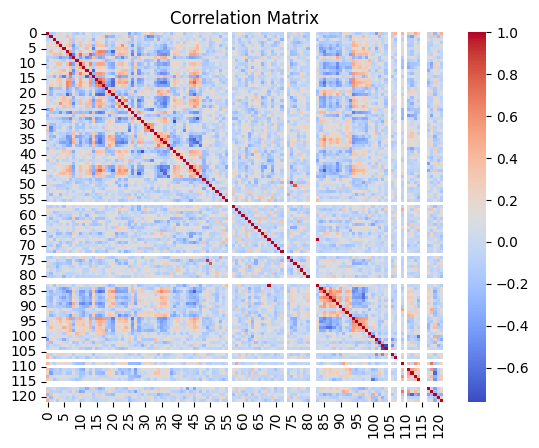

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

# Compute correlation matrix
correlation_matrix = df_imputed.corr(method="pearson")

# Visualize the correlation matrix
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation matrix for strong correlations

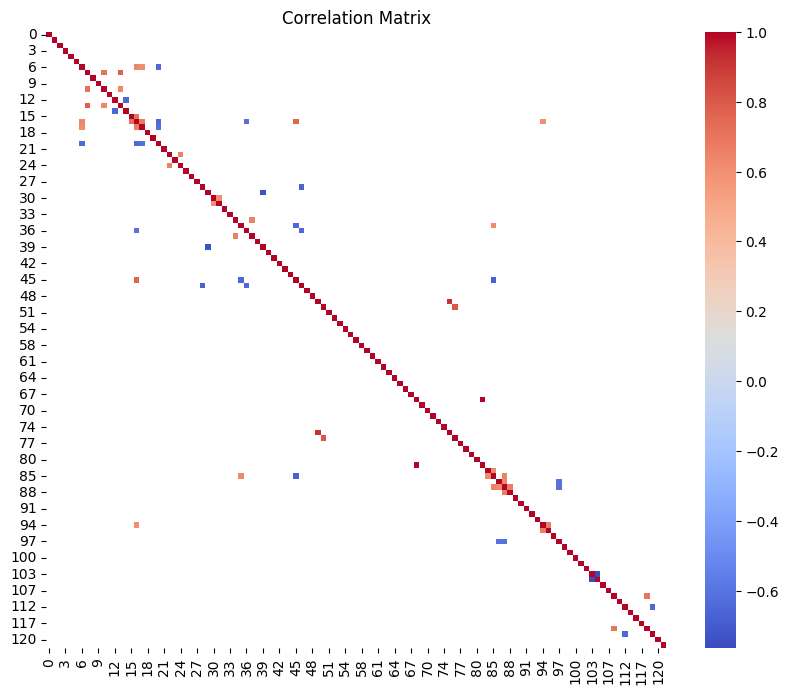

In [297]:
# Set the threshold
threshold = 0.6

# Filter the correlation matrix based on the threshold
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# replace values below the threshold with NaN
strong_correlations = strong_correlations.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

strong_correlations.to_excel('correlations.xlsx')

## 383-108 correlation values above .50
## 95 above .60

### Correlation matrix for strong correlations/above threshold

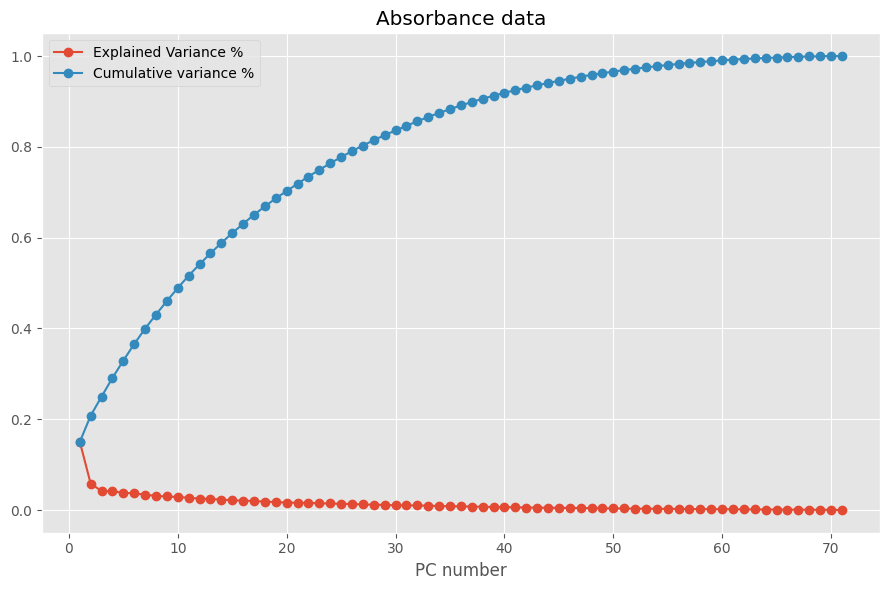

In [298]:
from sklearn.decomposition import PCA

n_components = 71

# Apply PCA
# 25 account for ~78% of the variance
pca = PCA(n_components)
principalComponents = pca.fit(df_imputed)

expl_var = principalComponents.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,n_components,n_components)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax.plot(pc_array, expl_var,'-o', label="Explained Variance %")
    ax.plot(pc_array, np.cumsum(expl_var),'-o', label = 'Cumulative variance %')
    ax.set_xlabel("PC number")
    ax.set_title('Absorbance data')
 
    plt.legend()
    plt.show()

### Principal component analysis (PCA)

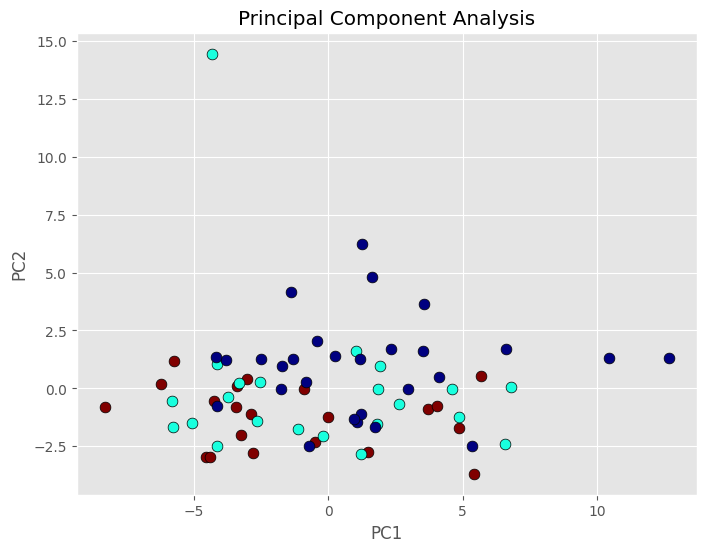

In [299]:
pca = PCA(n_components=25)
 
# Transform on the scaled features
principalComponents = pca.fit_transform(df_imputed)

# Define the labels for the plot legend
#labplot = []
lab = df.values[:,1] 

# Scatter plot for two principal components
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [principalComponents[j,0] for j in range(len(principalComponents[:,0])) if lab[j] == u]
        yi = [principalComponents[j,1] for j in range(len(principalComponents[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    #plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

## Inspecting Individual Correlations
Example:

Influence of wording in SoCQ1P vs SoCQ1N --> does SoCQ1N positively correlate with CompN, does SoCQ1P positively correlate with CompP

Remarks:
Kinda unsafe for now, requires questions df for questions so we do not have to depend on the ordering.

In [300]:
from scipy.stats import pearsonr
import re

# put some substring of the respective variables, e.g. codes
substring1 = "SoCQ1P"
substring2 = "SoCQ1N"

'''
col list included thigs like "SoCQ1N[SQ004]. Choose the tendency best describing
your current experience.  Here and now, ... [I have the feeling others treated me unfairly.]" before
'''

var1 = list(filter(lambda a: substring1 in a, col_list))
var2 = list(filter(lambda a: substring2 in a, col_list))

if len(var1)>1:
    print(f"Found multiple matches for {substring1}, first was selected:")
    print(*list(var1), sep="\n")
    print()
    
if len(var2)>1:
    print(f"Found multiple matches for {substring2}, first was selected:")
    print(*list(var2), sep="\n")
    print()

var1, var2 = var1[0], var2[0]

Found multiple matches for SoCQ1P, first was selected:
SoCQ1P[SQ001]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I really care about what is happening around me.]
SoCQ1P[SQ002]. Choose the tendency best describing your current experience.  Here and now, ... [I feel contented by someone I countedd on.]
SoCQ1P[SQ003]. Choose the tendency best describing your current experience.  Here and now, ... [I feel positively surprized by someone I thought I knew well.]
SoCQ1P[SQ004]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling others treated me fairly.]
SoCQ1P[SQ005]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I am in an unfamiliar situation and know what to do.]
SoCQ1P[SQ006]. Choose the tendency best describing your current experience.  Here and now, ... [I experience emotions I can accept to feel.]
SoCQ1P[SQ007]. Choose the ten

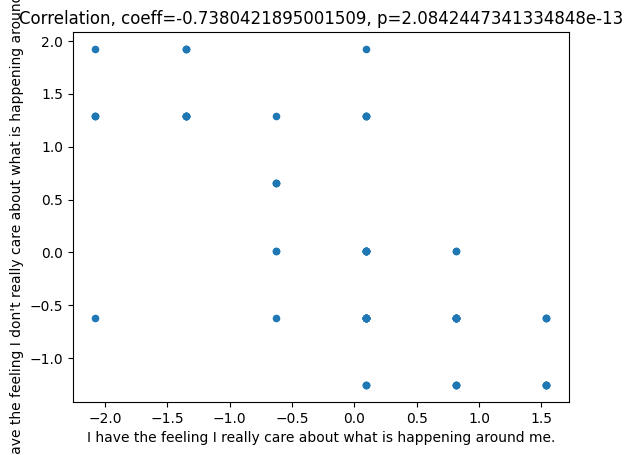

In [301]:
#warning: many points lie on top of each other.... colorcoding? artificial "noise"?
#todo: indexing df for questions instead, fix axis ranges after discussing nans
index1=list(col_list).index(var1)
index2=list(col_list).index(var2)

pearson, p = pearsonr(df_imputed[index1], df_imputed[index2])
ax = df.plot.scatter(index1, index2)
plt.title(f"Correlation, coeff={pearson}, p={p}")
ax.set_xlabel(re.findall(r"\[([\w\.\s]*)\]", list(col_list)[index1])[-1])
ax.set_ylabel(re.findall(r"\[([\w\.\s']*)\]", list(col_list)[index2])[-1])
plt.show()

## Grouping
Idea: look how variables behave in different groups, e.g. emergent clusters in PC-space or simply how another question was answered.

In [302]:
criterion = "SoCQ1P"
variable = "SoCQ1N"

var1 = list(filter(lambda a: criterion in a, col_list))
var2 = list(filter(lambda a: variable in a, col_list))

if len(var1)>1:
    print(f"Found multiple matches for {criterion}, first was selected:")
    print(*list(var1), sep="\n")
    print()
    
if len(var2)>1:
    print(f"Found multiple matches for {variable}, first was selected:")
    print(*list(var2), sep="\n")
    print()

var1, var2 = var1[0], var2[0]

Found multiple matches for SoCQ1P, first was selected:
SoCQ1P[SQ001]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I really care about what is happening around me.]
SoCQ1P[SQ002]. Choose the tendency best describing your current experience.  Here and now, ... [I feel contented by someone I countedd on.]
SoCQ1P[SQ003]. Choose the tendency best describing your current experience.  Here and now, ... [I feel positively surprized by someone I thought I knew well.]
SoCQ1P[SQ004]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling others treated me fairly.]
SoCQ1P[SQ005]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I am in an unfamiliar situation and know what to do.]
SoCQ1P[SQ006]. Choose the tendency best describing your current experience.  Here and now, ... [I experience emotions I can accept to feel.]
SoCQ1P[SQ007]. Choose the ten

<Axes: xlabel='39'>

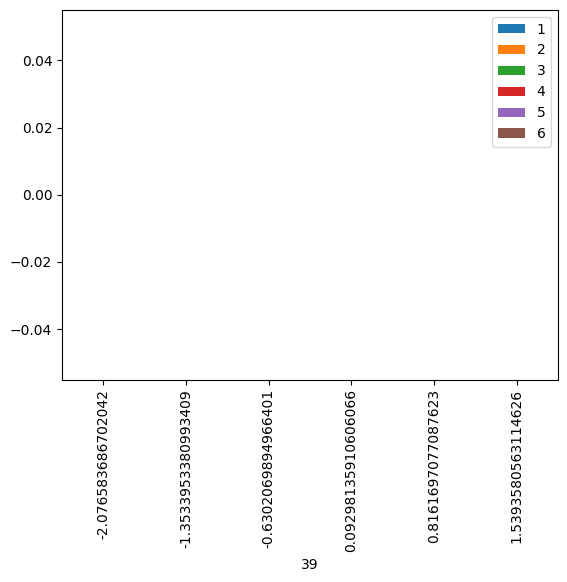

In [303]:
index1=list(col_list).index(var1)
index2=list(col_list).index(var2)

df2=df[[index1, index2]].copy()
for i in range(1,7):
    func = lambda x: 1 if x==i else 0
    df2[i]=df2[index2].apply(func)
df2 = df2.groupby(index1).sum()
df2 = df2.drop(columns=29)
df2.plot.bar()